## Загрузка библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "/content/drive/MyDrive/Rabota/Pandas_exel/export_maquette.xlsx"

In [4]:
def load_excel_file(file_path):
    """
    Загрузить файл Excel в DataFrame.

    Параметры:
    file_path (str): Путь к файлу Excel.

    Возвращает:
    pandas.DataFrame: DataFrame с данными из файла Excel.
    """
    try:
        # Загрузить файл Excel в DataFrame
        df = pd.read_excel(file_path)
        return df
    except FileNotFoundError:
        # Если файл не найден, вернуть ошибку
        print(f"Файл {file_path} не найден.")
        return None
    except Exception as e:
        # Если произошла ошибка при загрузке файла, вернуть ошибку
        print(f"Ошибка загрузки файла: {e}")
        return None

In [5]:
df = load_excel_file(file_path)

In [6]:
def process_files(df):
    # Разбить колонку FILES по запятым и получить список значений для каждой строки
    df['FILES'] = df['FILES'].str.split(',')
    # Преобразовать список значений в отдельные колонки
    df_files = df['FILES'].apply(lambda x: pd.Series(x))
    # Переименовать колонки
    df_files.columns = [f'FILE_{i}' for i in range(1, len(df_files.columns) + 1)]
    # Объединить DataFrame с колонкой 'OBJECTS' и разбитой колонкой 'FILES'
    df = pd.concat([df[['OBJECTS']], df_files], axis=1)
    return df


# вызываем функцию
df = process_files(df)

In [7]:
df

,OBJECTS,FILE_1,FILE_2,FILE_3,FILE_4,FILE_5,FILE_6,FILE_7,FILE_8,FILE_9,...,FILE_111,FILE_112,FILE_113,FILE_114,FILE_115,FILE_116,FILE_117,FILE_118,FILE_119,FILE_120
0,"01.01 Прочая реклама,05.02 Иностранные слова,0...",1916024.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.01 Прочая реклама,1916901.jpg,1916902.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05.02 Иностранные слова,1916883.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05.05 Физическое лицо,1917026.zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01 Прочая реклама,1919350.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,01.01 Прочая реклама,2041238.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6548,01.01 Прочая реклама,2041368.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6549,24.06 МедОрганизация/Аптека,2041384.jpg,2041385.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6550,01.01 Прочая реклама,2041457.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
''' Разбить колонку 'OBJECTS' по запятым и получить список значений для каждой строки,
перенести на строчки ниже разбитые значения, копируя по строчно значения'''
data= df
# Разбить колонку 'OBJECTS' по запятым и получить список значений для каждой строки
data['OBJECTS'] = data['OBJECTS'].str.split(',')

# Перенести разбитые значения на строчки ниже, копируя по строчно значения
data = data.explode('OBJECTS')

data

,OBJECTS,FILE_1,FILE_2,FILE_3,FILE_4,FILE_5,FILE_6,FILE_7,FILE_8,FILE_9,...,FILE_111,FILE_112,FILE_113,FILE_114,FILE_115,FILE_116,FILE_117,FILE_118,FILE_119,FILE_120
0,01.01 Прочая реклама,1916024.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,05.02 Иностранные слова,1916024.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,05.07 QR-код / адрес сайта,1916024.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.01 Прочая реклама,1916901.jpg,1916902.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05.02 Иностранные слова,1916883.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,01.01 Прочая реклама,2041238.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6548,01.01 Прочая реклама,2041368.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6549,24.06 МедОрганизация/Аптека,2041384.jpg,2041385.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6550,01.01 Прочая реклама,2041457.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Подсчёт количества уникальных значений в столбце

In [9]:
len(data['OBJECTS'].unique())

39

In [10]:
# Посчитать количество столбцов со значением в строке, кроме первого столбца OBJECTS
data['COUNT'] = data.drop('OBJECTS', axis=1).notna().sum(axis=1)
# объединяем повторяющиеся значения в столбце 'Столбец_1' и суммируем значения в столбце 'Столбец_2'
df = data.groupby('OBJECTS')['COUNT'].sum().reset_index()
df

,OBJECTS,COUNT
0,01.01 Прочая реклама,10732
1,02.01 Агитация,5
2,02.03 Объявление о работе,206
3,02.04 Объявление о продаже,77
4,02.05 Адвокаты,1
5,05.01 Сравнения (лучший и т.д.),24
6,05.02 Иностранные слова,259
7,05.03 Информационная продукция,410
8,05.04 Запрещенные информ. ресурсы,5
9,05.05 Физическое лицо,1065


## Графическое представление

In [32]:
import plotly.express as px

In [44]:
fig = px.bar(df, x='OBJECTS', y='COUNT')
# Изменяем угол наклона текста по оси x и размер графика
fig.update_layout(
    xaxis=dict(tickangle=45),
    height=800
)

fig.show()

In [45]:
fig = px.scatter(df, x=[100,30,50,60,20,1000,2000,10,300,500,5000,770,800,710,4000,600,4000,3000,7000,10000,3000,9000,200,70,8,9,6,4,32,60,56,89,554,987,7654,7654,8765,876,998], y='COUNT',
	         size="COUNT", color="OBJECTS",
                 hover_name="OBJECTS", log_x=True, size_max=60)
fig.show()

In [31]:
import plotly.graph_objects as go

In [52]:
# Создаем анимированную круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=df['OBJECTS'], values=df["COUNT"])])

# Настройка графика
fig.update_layout(title='Анимированная круговая диаграмма',
                  width=1500, height=1000)

# Отображение графика
fig.show()

In [55]:
def plot_large_values(df, threshold):
    # Отображаем только большие значения
    df_grouped_large = df[df["COUNT"] > threshold]
    # Создаем анимированную круговую диаграмму
    fig = go.Figure(data=[go.Pie(labels=df_grouped_large['OBJECTS'], values=df_grouped_large["COUNT"])])

    # Настройка графика
    fig.update_layout(title='Анимированная круговая диаграмма',
                  width=1500, height=800)

    # Отображение графика
    fig.show()

In [56]:
plot_large_values(df, 150)

## Matplotlib

In [11]:
import matplotlib.pyplot as plt

In [22]:
def matplotlib_grafik(df, threshold):
    # Отображаем только значения больше threshold и меньше 8000
    df_grouped_large = df[(df["COUNT"] > threshold) & (df["COUNT"] < 8000)]
    #df_grouped_large = df[df["COUNT"] > threshold]  &  (df[df["COUNT"] < 8000])
    # Выводим столбчатую разноцветную диаграмму
    plt.figure(figsize=(6, 6))
    plt.bar(df_grouped_large['OBJECTS'], df_grouped_large["COUNT"], color=plt.cm.tab20(range(len(df_grouped_large))))
    plt.xticks(rotation=50, ha='right')
    plt.xlabel('Категория')
    plt.ylabel('Значение')
    plt.title('Столбчатая разноцветная диаграмма')
    plt.show()

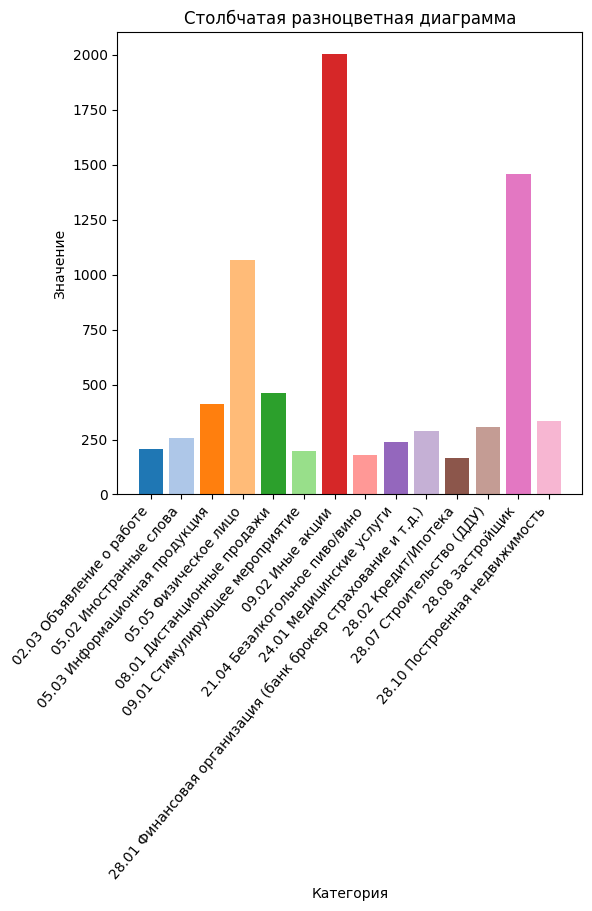

In [23]:
matplotlib_grafik(df,150)

In [25]:
# выводим значения в порядке возрастания
df_sorted = df.sort_values(by="COUNT")

# выводим результат
print(df_sorted)

                                              OBJECTS  COUNT
38                                29.01 Ценные бумаги      1
4                                      02.05 Адвокаты      1
29                             28.06 Инвест-платформа      1
23                                          25.01 БАД      1
10                                  05.06 Банкротство      1
1                                      02.01 Агитация      5
34                            28.11 Земельные участки      5
8                   05.04 Запрещенные информ. ресурсы      5
32                         28.09 Архитектурный проект     11
25                                      27.02 Лотерея     11
21    24.05 Методы лечения профилактики и диагностики     14
19                          24.02 Медицинские изделия     16
28                                        28.03 Вклад     24
5                     05.01 Сравнения (лучший и т.д.)     24
37                                     28.14 Ломбарды     28
15                      

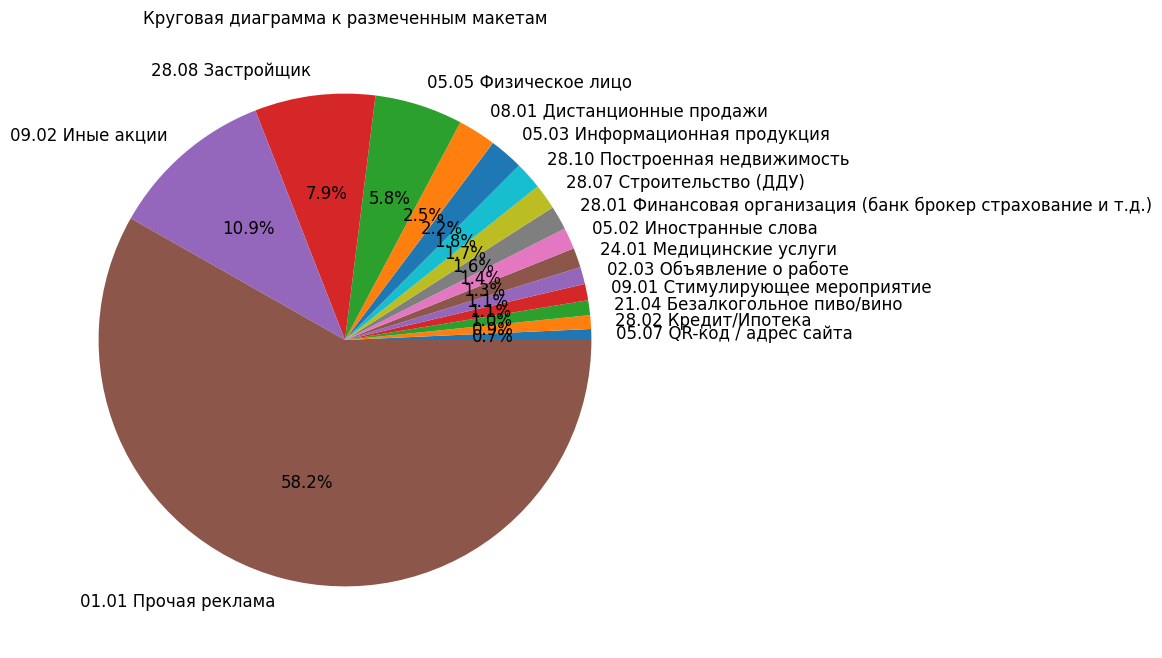

In [37]:
df_sorted_filtered = df_sorted[df_sorted['COUNT'] > 100]
# Выводим круговую диаграмму
plt.figure(figsize=(15, 8))
plt.pie(df_sorted_filtered["COUNT"], labels=df_sorted_filtered['OBJECTS'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Круговая диаграмма к размеченным макетам')
plt.show()

## Plotly2

In [33]:
fig = px.bar(df_sorted, x='OBJECTS', y='COUNT')
# Изменяем угол наклона текста по оси x и размер графика
fig.update_layout(
    xaxis=dict(tickangle=45),
    height=800
)

fig.show()

In [34]:
df_sorted_filtered = df_sorted[df_sorted['COUNT'] > 100]
fig = px.bar(df_sorted_filtered, x='OBJECTS', y='COUNT')
# Изменяем угол наклона текста по оси x и размер графика
fig.update_layout(
    xaxis=dict(tickangle=45),
    height=800
)
fig.show()

## Dash Plotly

In [45]:
!pip install jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [49]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [51]:
# Создайте график с помощью Plotly Express
fig = px.bar(df_sorted, x='OBJECTS', y='COUNT')

# Создайте приложение Dash
app = dash.Dash(__name__)

# Определите макет приложения
app.layout = html.Div([
    dcc.Dropdown(
        id='тип-графика',
        options=[
            {'label': 'Столбчатый график', 'value': 'bar'},
            {'label': 'Линейный график', 'value': 'line'}
        ],
        value='bar'
    ),
    dcc.Graph(id='график', figure=fig)
])

# Обновите график в зависимости от выбора пользователя
@app.callback(
    Output('график', 'figure'),
    [Input('тип-графика', 'value')]
)
def update_graph(тип_графика):
    if тип_графика == 'bar':
        fig = px.bar(df_sorted, x='OBJECTS', y='COUNT')
    elif тип_графика == 'line':
        fig = px.line(df_sorted, x='OBJECTS', y='COUNT')
    return fig

# Запустите приложение
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

## Seaborn

In [38]:
import seaborn as sns

Срез от 100

In [41]:
# выводим значения в порядке убывания
df_sorted1 = df_sorted.sort_values(by='COUNT', ascending=False)
df_sorted1 = df_sorted1[0:16]
df_sorted1

,OBJECTS,COUNT
0,01.01 Прочая реклама,10732
14,09.02 Иные акции,2001
31,28.08 Застройщик,1457
9,05.05 Физическое лицо,1065
12,08.01 Дистанционные продажи,460
7,05.03 Информационная продукция,410
33,28.10 Построенная недвижимость,335
30,28.07 Строительство (ДДУ),308
26,28.01 Финансовая организация (банк брокер стра...,289
6,05.02 Иностранные слова,259


Переменовка текста

In [52]:
# Создайте словарь для переименования строк
rename_dict = {
    '01.01 Прочая реклама': 'Прочая реклама',
    '09.02 Иные акции': 'Иные акции',
    '28.08 Застройщик': 'Застройщик',
    '05.05 Физическое лицо': 'Физ. лицо',
    '08.01 Дистанционные продажи': 'Дистанц. продажи',
    '05.03 Информационная продукция': 'Инф. продукция',
    '28.10 Построенная недвижимость': 'Недвижимость',
    '28.07 Строительство (ДДУ)': 'Строительство',
    '28.01 Финансовая организация (банк брокер страхование и т.д.)': 'Финанс. орг.',
    '05.02 Иностранные слова': 'Иностранные слова',
    '24.01 Медицинские услуги': 'Медицинские услуги',
    '02.03 Объявление о работе': 'Объявление о работе',
    '09.01 Стимулирующее мероприятие': 'Стимулир. меропр',
    '21.04 Безалкогольное пиво/вино': 'Безалкогольное',
    '28.02 Кредит/Ипотека': 'Кредит/Ипотека',
    '05.07 QR-код / адрес сайта': 'QR-код/сайт'
}

# Переименуйте строки с помощью метода map()
df_sorted1['OBJECTS'] = df_sorted1['OBJECTS'].map(rename_dict)

<Axes: xlabel='COUNT', ylabel='OBJECTS'>

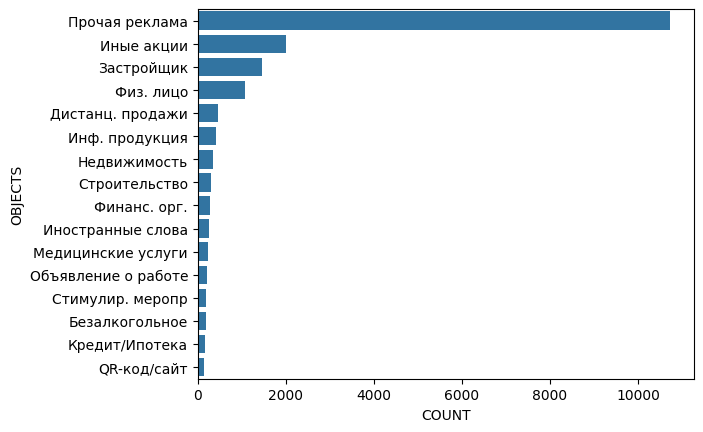

In [53]:
sns.barplot(x='COUNT', y='OBJECTS', data=df_sorted1, orient='h')# h-горизонтальная диаграмма

## Данные в виде макетов по категориям, которые передал заказчик

In [54]:
df1 = load_excel_file(file_path)

In [57]:
def process_files(df1):
    # Разбить колонку FILES по запятым и получить список значений для каждой строки
    df1['FILES'] = df1['FILES'].str.split(',')
    # Преобразовать список значений в отдельные колонки
    df_files = df1['FILES'].apply(lambda x: pd.Series(x))
    # Переименовать колонки
    df_files.columns = [f'FILE_{i}' for i in range(1, len(df_files.columns) + 1)]
    # Объединить DataFrame с колонкой 'OBJECTS' и разбитой колонкой 'FILES'
    df1 = pd.concat([df1[['OBJECTS']], df_files], axis=1)
    # Посчитать количество столбцов со значением в строке, кроме первого столбца
    df1['Summa'] = df1.iloc[:, 1:].count(axis=1)
    # объединяем повторяющиеся значения в столбце 'Столбец_1' и суммируем значения в столбце 'Столбец_2'
    df1 = df1.groupby('OBJECTS')['Summa'].sum().reset_index()
    # выводим значения в порядке убывания
    df1 = df1.sort_values(by='Summa', ascending=False)
    return df1


# вызываем функцию
df1 = process_files(df1)

In [58]:
df1

,OBJECTS,Summa
0,01.01 Прочая реклама,8787
211,28.08 Застройщик,873
79,"01.01 Прочая реклама,09.02 Иные акции",479
170,09.02 Иные акции,398
140,05.05 Физическое лицо,287
...,...,...
118,"05.02 Иностранные слова,05.03 Информационная п...",1
116,"05.01 Сравнения (лучший и т.д.),05.05 Физическ...",1
115,"05.01 Сравнения (лучший и т.д.),05.02 Иностран...",1
113,02.05 Адвокаты,1


In [60]:
df1= df1[0:25]
df1

,OBJECTS,Summa
0,01.01 Прочая реклама,8787
211,28.08 Застройщик,873
79,"01.01 Прочая реклама,09.02 Иные акции",479
170,09.02 Иные акции,398
140,05.05 Физическое лицо,287
219,28.10 Построенная недвижимость,188
106,02.03 Объявление о работе,187
61,"01.01 Прочая реклама,05.05 Физическое лицо,09....",176
185,24.01 Медицинские услуги,170
147,"05.05 Физическое лицо,09.02 Иные акции",158


## Matplotlib

In [65]:
import matplotlib.pyplot as plt

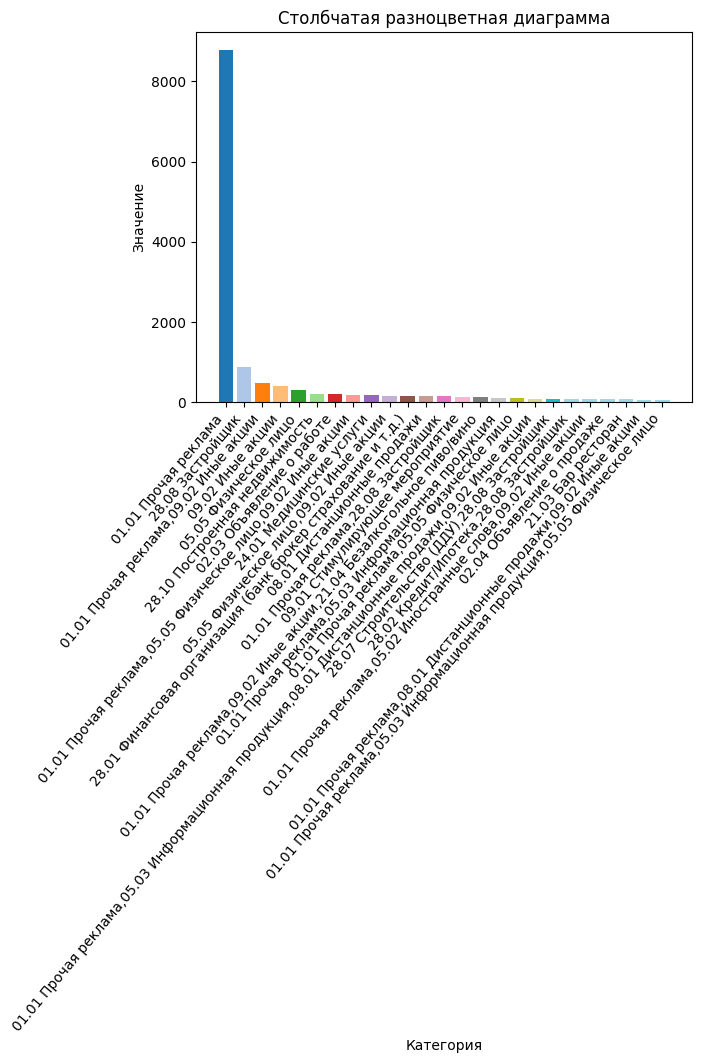

In [68]:
plt.bar(df1['OBJECTS'], df1["Summa"], color=plt.cm.tab20(range(len(df1))))
plt.xticks(rotation=50, ha='right')
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.title('Столбчатая разноцветная диаграмма')
plt.show()

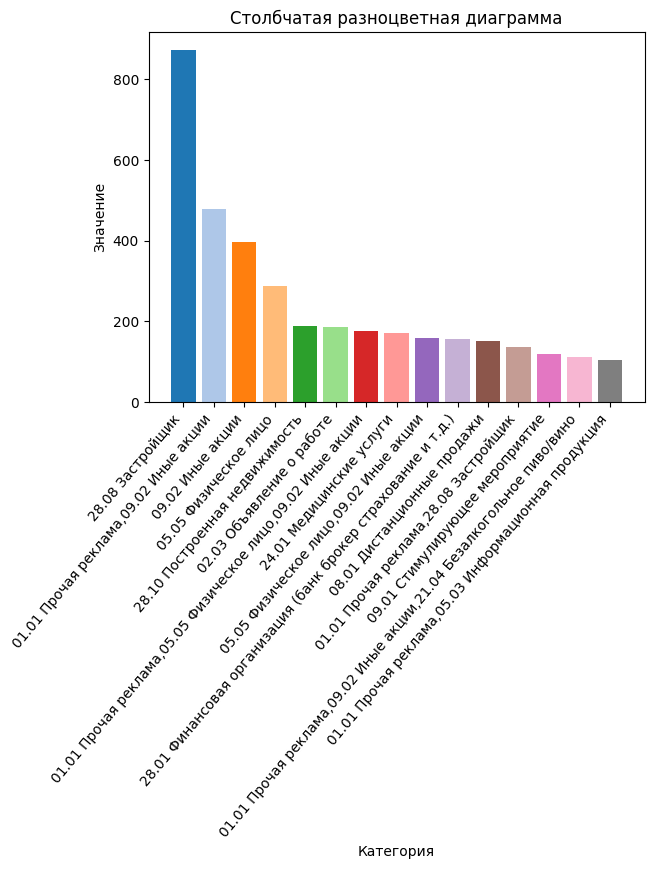

In [73]:
# Фильтруем данные
df1_filtered = df1[(df1['Summa'] < 8000) & (df1['Summa'] > 100)]

# Создаем график
plt.bar(df1_filtered['OBJECTS'], df1_filtered["Summa"], color=plt.cm.tab20(range(len(df1_filtered))))
plt.xticks(rotation=50, ha='right')
plt.xlabel('Категория')
plt.ylabel('Значение')
plt.title('Столбчатая разноцветная диаграмма')
plt.show()

In [72]:
import plotly.graph_objects as go
import pandas as pd

# Фильтруем данные
df1_filtered = df1[(df1['Summa'] < 8000) & (df1['Summa'] > 100)]

# Создаем график
fig = go.Figure(data=[go.Scatter(
    x=df1_filtered['OBJECTS'],
    y=df1_filtered['Summa'],
    mode='markers',
    marker=dict(size=df1_filtered['Summa']/10, color=df1_filtered['Summa'], colorscale='Viridis')
)])

# Добавляем заголовок и метки осей
fig.update_layout(
    title='График объектов и их количества',
    xaxis_title='OBJECTS',
    yaxis_title='Summa',
    width=800,  # Увеличиваем ширину графика
    height=1000  # Увеличиваем высоту графика
)

# Показываем график
fig.show()